## Evaluate ToxiCR predictions in my Dataset (filename: test_mydata.xlsx)

In [ ]:
!pip install seaborn

Accuracy: 0.5719148936170213
Precision: 0.9970588235294118
Recall: 0.14425531914893616
F1 Score: 0.2520446096654275
Confusion Matrix:
[[2349    1]
 [2011  339]]


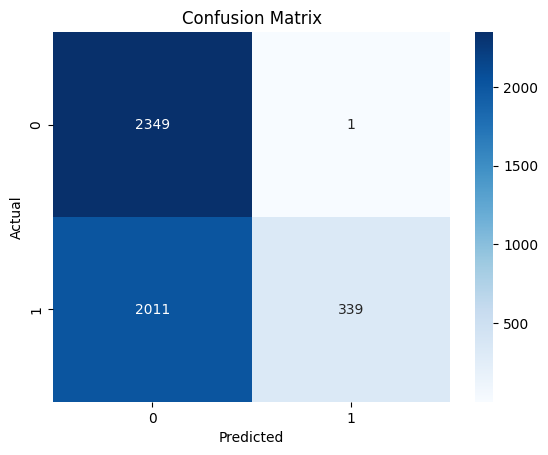

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
file_path = 'prediction_mydata_by_ToxiCR.csv'
data = pd.read_csv(file_path)

# Extract prediction and actual values
predictions = data['prediction']
actual = data['actual']

# Calculate metrics
accuracy = accuracy_score(actual, predictions)
precision = precision_score(actual, predictions)
recall = recall_score(actual, predictions)
f1 = f1_score(actual, predictions)

# Create a confusion matrix
confusion = confusion_matrix(actual, predictions)

# Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

# Create a fancy confusion matrix heatmap
class_names = ['0', '1']  # Replace with your class labels
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Evaluate MyModel predictions in my splited test Dataset (filename: for_Test_data.xlsx)

Accuracy: 0.9622021364009861
Precision: 0.9277310924369748
Recall: 0.9184692179700499
F1 Score: 0.9230769230769231
Confusion Matrix:
[[1790   43]
 [  49  552]]


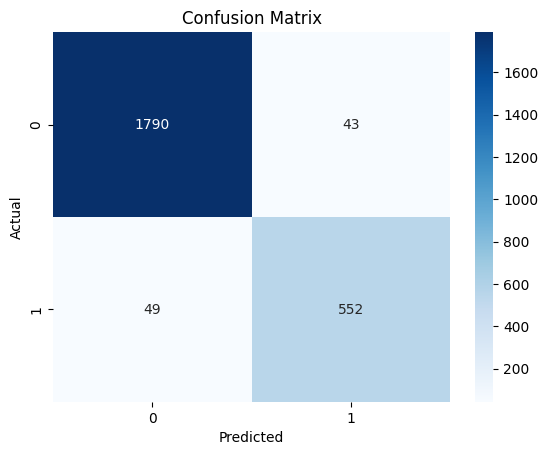

In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
file_path = 'prediction_mytestData.csv'
data = pd.read_csv(file_path)

# Extract prediction and actual values
predictions = data['prediction']
actual = data['actual']

# Calculate metrics
accuracy = accuracy_score(actual, predictions)
precision = precision_score(actual, predictions)
recall = recall_score(actual, predictions)
f1 = f1_score(actual, predictions)

# Create a confusion matrix
confusion = confusion_matrix(actual, predictions)

# Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

# Create a fancy confusion matrix heatmap
class_names = ['0', '1']  # Replace with your class labels
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [3]:
import pandas as pd
from openpyxl import load_workbook

# Load the CSV file into a pandas DataFrame
file_path = 'prediction_mydata_by_ToxiCR.csv'

data = pd.read_csv(file_path)

# Create a function to apply styles to rows
def color_rows(row):
    if row['prediction'] == 0 and row['actual'] == 1:
        return ['background-color: #FFD6D6'] * len(row)
    else:
        return [''] * len(row)

# Apply the function to the DataFrame
styled_data = data.style.apply(color_rows, axis=1)

# Save the styled DataFrame to an Excel file
styled_file_path = 'styled_output.xlsx'
styled_data.to_excel(styled_file_path, engine='openpyxl', index=False)

print("Styled file saved:", styled_file_path)


Styled file saved: styled_output.xlsx


In [4]:
import pandas as pd

# Load the original CSV file into a pandas DataFrame
original_file_path = 'prediction_github_projectsComment/prediction_comments_tutorials.csv'
data = pd.read_csv(original_file_path)

# Filter rows where the "prediction" column value is 1
filtered_data = data[data['prediction'] == 1]

# Add a new column with the CSV file name
filtered_data['file_name'] = 'prediction_comments_tutorials.csv'

# Save the filtered data to a new CSV file
filtered_file_path = 'uncivil_github_comments.csv'
filtered_data.to_csv(filtered_file_path, mode='a', header=False, index=False)

print("Filtered data saved to:", filtered_file_path)


Filtered data saved to: uncivil_github_comments.csv


/tmp/ipykernel_539923/2592131918.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['file_name'] = 'prediction_comments_tutorials.csv'


## Manual investigation of github comments detected as Uncivil and compare the result with ToxiCR

In [ ]:
import pandas as pd
import random

# Load the base CSV file into a pandas DataFrame
# Load the base CSV file into a pandas DataFrame
base_file_path = 'prediction_uncivil_github_comments.csv'
base_data = pd.read_csv(base_file_path)

# Set the number of rows to select randomly
n = 364  # Adjust this number as needed  95% confidence and 5% error-rate

# Shuffle the base data to ensure randomness
shuffled_data = base_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the shuffled data into non-overlapping segments
segment_length = len(shuffled_data) // 3
segment_1 = shuffled_data[:segment_length]
segment_2 = shuffled_data[segment_length:2 * segment_length]
segment_3 = shuffled_data[2 * segment_length:]

# Select n rows from each segment
selected_data_1 = segment_1.sample(n=n, random_state=42)
selected_data_2 = segment_2.sample(n=n, random_state=43)  # Use different random_state
selected_data_3 = segment_3.sample(n=n, random_state=44)  # Use different random_state

# Save selected data to separate CSV files
selected_file_path_1 = 'Manual_investigation_data_1.csv'
selected_data_1.to_csv(selected_file_path_1, index=False)

selected_file_path_2 = 'Manual_investigation_data_2.csv'
selected_data_2.to_csv(selected_file_path_2, index=False)

selected_file_path_3 = 'Manual_investigation_data_3.csv'
selected_data_3.to_csv(selected_file_path_3, index=False)

print("Selected data saved to:", selected_file_path_1)
print("Selected data saved to:", selected_file_path_2)
print("Selected data saved to:", selected_file_path_3)


## Manual analysis of predicted result of ToxiCR and MyModel for detection 

In [6]:
import pandas as pd

# Load the Excel file
xlsx_file_path = "Manual_investigation_Final.xlsx"
df = pd.read_excel(xlsx_file_path)

# Calculate metrics for "MModel" predictions
actual_values = df["actual"]
mmodel_predictions = df["Mmodel"]
toxicr_predictions = df["ToxiCR"]

# Calculate TP, TN, FP, FN for "MModel" predictions
mmodel_tp = sum((actual_values == 1) & (mmodel_predictions == 1))
mmodel_tn = sum((actual_values == 0) & (mmodel_predictions == 0))
mmodel_fp = sum((actual_values == 0) & (mmodel_predictions == 1))
mmodel_fn = sum((actual_values == 1) & (mmodel_predictions == 0))

# Calculate TP, TN, FP, FN for "ToxiCR" predictions
toxicr_tp = sum((actual_values == 1) & (toxicr_predictions == 1))
toxicr_tn = sum((actual_values == 0) & (toxicr_predictions == 0))
toxicr_fp = sum((actual_values == 0) & (toxicr_predictions == 1))
toxicr_fn = sum((actual_values == 1) & (toxicr_predictions == 0))

# Calculate the number of positive and negative instances in the "actual" column
num_positive_actual = sum(actual_values == 1)
num_negative_actual = sum(actual_values == 0)

print("Number of Positive Instances in Actual:", num_positive_actual)
print("Number of Negative Instances in Actual:", num_negative_actual)

# Print the results for MModel
print("Metrics for MModel:")
print("True Positives:", mmodel_tp)
print("True Negatives:", mmodel_tn)
print("False Positives:", mmodel_fp)
print("False Negatives:", mmodel_fn)

# Print the results for ToxiCR
print("\nMetrics for ToxiCR:")
print("True Positives:", toxicr_tp)
print("True Negatives:", toxicr_tn)
print("False Positives:", toxicr_fp)
print("False Negatives:", toxicr_fn)


Number of Positive Instances in Actual: 571
Number of Negative Instances in Actual: 444
Metrics for MModel:
True Positives: 571
True Negatives: 350
False Positives: 94
False Negatives: 0

Metrics for ToxiCR:
True Positives: 364
True Negatives: 386
False Positives: 58
False Negatives: 207


In [7]:
# Calculate precision, recall, specificity, and F1-score for binary classification
def calculate_metrics(tp, tn, fp, fn):
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return precision, recall, specificity, f1_score

# Calculate metrics for "MModel" predictions
mmodel_precision, mmodel_recall, mmodel_specificity, mmodel_f1 = calculate_metrics(mmodel_tp, mmodel_tn, mmodel_fp, mmodel_fn)

# Calculate metrics for "ToxiCR" predictions
toxicr_precision, toxicr_recall, toxicr_specificity, toxicr_f1 = calculate_metrics(toxicr_tp, toxicr_tn, toxicr_fp, toxicr_fn)

# Print the results for MModel
print("Metrics for MModel:")
print("Precision:", mmodel_precision)
print("Recall:", mmodel_recall)
print("Specificity:", mmodel_specificity)
print("F1-Score:", mmodel_f1)

# Print the results for ToxiCR
print("\nMetrics for ToxiCR:")
print("Precision:", toxicr_precision)
print("Recall:", toxicr_recall)
print("Specificity:", toxicr_specificity)
print("F1-Score:", toxicr_f1)


Metrics for MModel:
Precision: 0.8586466165413534
Recall: 1.0
Specificity: 0.7882882882882883
F1-Score: 0.923948220064725

Metrics for ToxiCR:
Precision: 0.8625592417061612
Recall: 0.637478108581436
Specificity: 0.8693693693693694
F1-Score: 0.7331319234642497


In [11]:
import pandas as pd

# Load the Excel file
xlsx_file_path = "Manual_investigation_Final.xlsx"
df = pd.read_excel(xlsx_file_path)

# Calculate metrics for "MModel" predictions
actual_values = df["actual"]
mmodel_predictions = df["GPT4"]


# Calculate TP, TN, FP, FN for "MModel" predictions
mmodel_tp = sum((actual_values == 1) & (mmodel_predictions == 1))
mmodel_tn = sum((actual_values == 0) & (mmodel_predictions == 0))
mmodel_fp = sum((actual_values == 0) & (mmodel_predictions == 1))
mmodel_fn = sum((actual_values == 1) & (mmodel_predictions == 0))

# Calculate the number of positive and negative instances in the "actual" column
num_positive_actual = sum(actual_values == 1)
num_negative_actual = sum(actual_values == 0)

print("Number of Positive Instances in Actual:", num_positive_actual)
print("Number of Negative Instances in Actual:", num_negative_actual)

# Print the results for GPT
print("Metrics for MModel:")
print("True Positives:", mmodel_tp)
print("True Negatives:", mmodel_tn)
print("False Positives:", mmodel_fp)
print("False Negatives:", mmodel_fn)


Number of Positive Instances in Actual: 571
Number of Negative Instances in Actual: 444
Metrics for MModel:
True Positives: 121
True Negatives: 442
False Positives: 2
False Negatives: 450


In [12]:
# Calculate precision, recall, specificity, and F1-score for binary classification
def calculate_metrics(tp, tn, fp, fn):
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return precision, recall, specificity, f1_score

# Calculate metrics for "MModel" predictions
mmodel_precision, mmodel_recall, mmodel_specificity, mmodel_f1 = calculate_metrics(mmodel_tp, mmodel_tn, mmodel_fp, mmodel_fn)

# Calculate metrics for "ToxiCR" predictions
toxicr_precision, toxicr_recall, toxicr_specificity, toxicr_f1 = calculate_metrics(toxicr_tp, toxicr_tn, toxicr_fp, toxicr_fn)

# Print the results for GPT4
print("Metrics for MModel:")
print("Precision:", mmodel_precision)
print("Recall:", mmodel_recall)
print("Specificity:", mmodel_specificity)
print("F1-Score:", mmodel_f1)



Metrics for MModel:
Precision: 0.983739837398374
Recall: 0.2119089316987741
Specificity: 0.9954954954954955
F1-Score: 0.3487031700288185


In [150]:
import pandas as pd
from scipy.stats import wilcoxon

# Read your CSV file
df = pd.read_csv('/u1/mdr614/ATUC_Final/Conversion_uncivil_to_civil_random_2000/Evaluation_metrics_after_conversion/Incivility_recalculation/civilAlternatives_by_Paragedi_random2000_incivilityDetection_byMyModel.csv')


# Count rows where the "civil" column contains the sentence "No Generated"
count_no_generated = df[df['civil'].str.contains("Not Generated")].shape[0]

print("Number of rows containing Not Generated in the 'civil' column:",count_no_generated)



# Assuming your 'prediction' column contains the numeric values 0 and 1
prediction_values = df['prediction'].values

# Create a new variable with all 1s
ones_array = [1] * len(prediction_values)


# Apply Wilcoxon signed-rank test
statistic, p_value = wilcoxon(prediction_values, ones_array)

# Output the results
print(f"Wilcoxon Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check if the p-value is significant at a 5% error level
if p_value < 0.05:
    print("The difference is statistically significant (p < 0.05)")
else:
    print("The difference is not statistically significant (p >= 0.05)")


# Count the number of 1s and get the total length
count_of_ones = sum(prediction_values) + count_no_generated
total_length = len(prediction_values)

# Output the results
print(f"Number of 1s in prediction_values: {count_of_ones}")
print(f"Total length of prediction_values: {total_length}")

# Assuming initial and final counts are available
initial_uncivil_comments = total_length
final_uncivil_comments = count_of_ones

# Calculate Reduction Percentage
reduction_percentage = ((initial_uncivil_comments - final_uncivil_comments) / initial_uncivil_comments) * 100

# Calculate Conversion Rate
conversion_rate = ((initial_uncivil_comments - final_uncivil_comments) / initial_uncivil_comments) * 100

# Print the results
print(f"Percentage improvement: {reduction_percentage:.2f}%")

Number of rows containing Not Generated in the 'civil' column: 0
Wilcoxon Statistic: 0.0
P-value: 0.0
The difference is statistically significant (p < 0.05)
Number of 1s in prediction_values: 217
Total length of prediction_values: 1999
Percentage improvement: 89.14%


In [167]:
import pandas as pd
from transformers import AutoTokenizer
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns 'uncivil' and 'civil'
df = pd.read_csv('/u1/mdr614/ATUC_Final/Conversion_uncivil_to_civil_random_2000/Incivility_conversion_results/civilAlternatives_by_PoliteBot_random2000.csv')  # Replace 'your_file.csv' with the actual CSV file name


# Choose a pre-trained tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# # Tokenize 'uncivil' and 'civil' columns and calculate token sizes
# df['uncivil_tokens'] = df['uncivil'].apply(lambda x: len(tokenizer(x)['input_ids']))
# df['civil_tokens'] = df['civil'].apply(lambda x: len(tokenizer(x)['input_ids']))


# Count the number of characters in 'uncivil' and 'civil' columns
df['uncivil_characters'] = df['uncivil'].str.len()

# Use numpy.where to conditionally assign lengths
df['civil_characters'] = np.where(df['civil'] == "Not Generated", df['uncivil_characters'], df['civil'].str.len())



# Pair and sort based on 'uncivil_tokens'
token_pairs = list(zip(df['uncivil_characters'], df['civil_characters']))
sorted_pairs = sorted(token_pairs, key=lambda x: x[0])

# Print the sorted pairs
for uncivil_size, civil_size in sorted_pairs:
    print(f"Uncivil Tokens: {uncivil_size}, Civil Tokens: {civil_size}")

# Create a DataFrame with sorted pairs and row numbers
sorted_df = pd.DataFrame(sorted_pairs, columns=['uncivil_characters', 'civil_characters'])
sorted_df['row_number'] = range(1, len(sorted_df) + 1)

# Save the DataFrame to a new CSV file
sorted_df.to_csv('sorted_token_sizes17.csv', index=False)

Uncivil Tokens: 1, Civil Tokens: 57
Uncivil Tokens: 3, Civil Tokens: 25
Uncivil Tokens: 3, Civil Tokens: 17
Uncivil Tokens: 4, Civil Tokens: 38
Uncivil Tokens: 4, Civil Tokens: 45
Uncivil Tokens: 4, Civil Tokens: 14
Uncivil Tokens: 4, Civil Tokens: 38
Uncivil Tokens: 4, Civil Tokens: 26
Uncivil Tokens: 4, Civil Tokens: 26
Uncivil Tokens: 4, Civil Tokens: 38
Uncivil Tokens: 4, Civil Tokens: 26
Uncivil Tokens: 4, Civil Tokens: 14
Uncivil Tokens: 5, Civil Tokens: 15
Uncivil Tokens: 5, Civil Tokens: 27
Uncivil Tokens: 5, Civil Tokens: 27
Uncivil Tokens: 6, Civil Tokens: 26
Uncivil Tokens: 6, Civil Tokens: 21
Uncivil Tokens: 6, Civil Tokens: 46
Uncivil Tokens: 6, Civil Tokens: 40
Uncivil Tokens: 6, Civil Tokens: 46
Uncivil Tokens: 6, Civil Tokens: 26
Uncivil Tokens: 6, Civil Tokens: 40
Uncivil Tokens: 7, Civil Tokens: 26
Uncivil Tokens: 7, Civil Tokens: 29
Uncivil Tokens: 7, Civil Tokens: 26
Uncivil Tokens: 7, Civil Tokens: 35
Uncivil Tokens: 7, Civil Tokens: 27
Uncivil Tokens: 7, Civil Tok

mean_squared_difference_T5:  0.007670534463137722
mean_squared_difference_Bart:  0.006657951135943156
mean_squared_difference_nllb:  0.0073685451001378605
mean_squared_difference_marian:  0.004210201597334056
mean_squared_difference_GPT35:  0.029881360381002243
mean_squared_difference_GPT4:  0.01091240167754506
mean_squared_difference_politebot:  0.4984229449181765
mean_squared_difference_madan:  0.05929287579195405
mean_squared_difference_marco:  7.093794303275693e-05
mean_squared_difference_paradetox:  0.5236230933542438
mean_squared_difference_paragedi:  0.07458354640001799
mean_squared_difference_condabert:  3.397597253802328e-05
mean_squared_difference_count:  0.5133719005588075
mean_squared_difference_diffudetox:  0.5447109516378167
Best:  0.004210201597334056


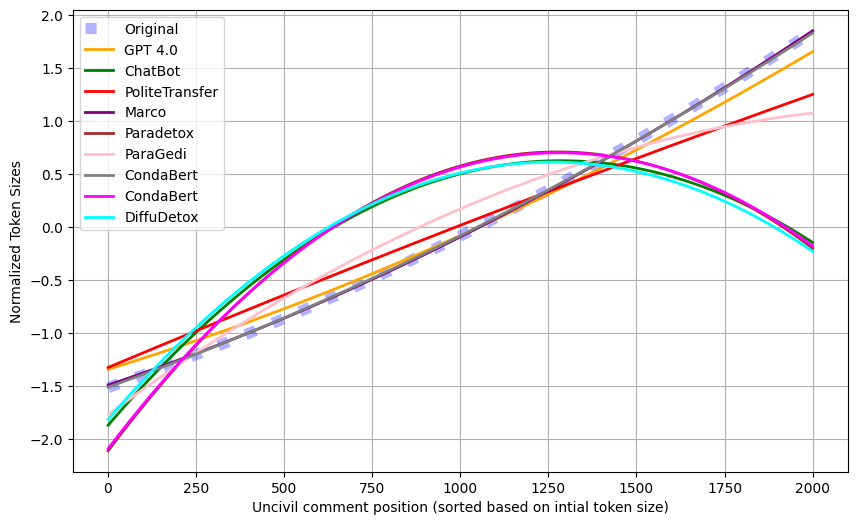

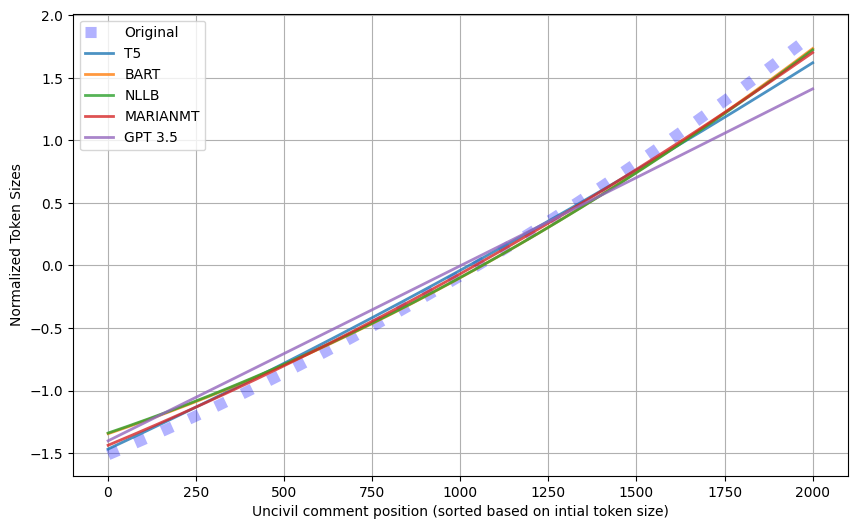

In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Assuming sorted_df is your DataFrame with sorted token sizes
sorted_df = pd.read_csv('charcter_count_all.csv')  # Replace 'sorted_token_sizes.csv' with the actual CSV file name

# Normalize the 'uncivil' and 'civil' token sizes
scaler = StandardScaler()
sorted_df['uncivil_tokens_normalized'] = scaler.fit_transform(sorted_df[['uncivil_tokens']])
sorted_df['bart_tokens_normalized'] = scaler.fit_transform(sorted_df[['bart']])
sorted_df['CondaBert_tokens_normalized'] = scaler.fit_transform(sorted_df[['condabert']])
sorted_df['GPT4_tokens_normalized'] = scaler.fit_transform(sorted_df[['gpt4']])
sorted_df['GPT35_tokens_normalized'] = scaler.fit_transform(sorted_df[['gpt35']])
sorted_df['madan_tokens_normalized'] = scaler.fit_transform(sorted_df[['madan']])
sorted_df['marco_tokens_normalized'] = scaler.fit_transform(sorted_df[['marco']])
sorted_df['marian_tokens_normalized'] = scaler.fit_transform(sorted_df[['marian']])
sorted_df['nllb_tokens_normalized'] = scaler.fit_transform(sorted_df[['nllb']])
sorted_df['paradetox_tokens_normalized'] = scaler.fit_transform(sorted_df[['paradetox']])
sorted_df['paragedi_tokens_normalized'] = scaler.fit_transform(sorted_df[['paragedi']])
sorted_df['politebot_tokens_normalized'] = scaler.fit_transform(sorted_df[['politebot']])
sorted_df['T5_tokens_normalized'] = scaler.fit_transform(sorted_df[['T5']])
sorted_df['Count_tokens_normalized'] = scaler.fit_transform(sorted_df[['count']])
sorted_df['Diffudetox_tokens_normalized'] = scaler.fit_transform(sorted_df[['diffudetox']])

# Prepare the data
X = sorted_df['row_number'].values.reshape(-1, 1)
y_uncivil = sorted_df['uncivil_tokens_normalized'].values.reshape(-1, 1)
y_bart = sorted_df['bart_tokens_normalized'].values.reshape(-1, 1)
y_condabert = sorted_df['CondaBert_tokens_normalized'].values.reshape(-1, 1)
y_GPT4 = sorted_df['GPT4_tokens_normalized'].values.reshape(-1, 1)
y_GPT35 = sorted_df['GPT35_tokens_normalized'].values.reshape(-1, 1)
y_madan = sorted_df['madan_tokens_normalized'].values.reshape(-1, 1)
y_marco = sorted_df['marco_tokens_normalized'].values.reshape(-1, 1)
y_marian = sorted_df['marian_tokens_normalized'].values.reshape(-1, 1)
y_nllb = sorted_df['nllb_tokens_normalized'].values.reshape(-1, 1)
y_paradetox = sorted_df['paradetox_tokens_normalized'].values.reshape(-1, 1)
y_paragedi = sorted_df['paragedi_tokens_normalized'].values.reshape(-1, 1)
y_politebot = sorted_df['politebot_tokens_normalized'].values.reshape(-1, 1)
y_t5 = sorted_df['T5_tokens_normalized'].values.reshape(-1, 1)
y_count = sorted_df['Count_tokens_normalized'].values.reshape(-1, 1)
y_diffudetox = sorted_df['Diffudetox_tokens_normalized'].values.reshape(-1, 1)



# Fit polynomial regression models
degree = 2
model_uncivil = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_uncivil.fit(X, y_uncivil)

model_bart = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_bart.fit(X, y_bart)

model_condabert = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_condabert.fit(X, y_condabert)

model_GPT4 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_GPT4.fit(X, y_GPT4)

model_GPT35 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_GPT35.fit(X, y_GPT35)

model_madan = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_madan.fit(X, y_madan)

model_marco= make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_marco.fit(X, y_marco)

model_marian = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_marian.fit(X, y_marian)

model_nllb = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_nllb.fit(X, y_nllb)

model_paradetox = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_paradetox.fit(X, y_paradetox)

model_paragedi = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_paragedi.fit(X, y_paragedi)

model_politebot = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_politebot.fit(X, y_politebot)

model_t5 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_t5.fit(X, y_t5)

model_count = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_count.fit(X, y_count)

model_diffudetox= make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_diffudetox.fit(X, y_diffudetox)



# Predict values using the models
X_pred = np.arange(min(X), max(X) + 1).reshape(-1, 1)
y_pred_uncivil = model_uncivil.predict(X_pred)
y_pred_bart = model_bart.predict(X_pred)
y_pred_condabert = model_condabert.predict(X_pred)
y_pred_GPT4 = model_GPT4.predict(X_pred)
y_pred_GPT35 = model_GPT35.predict(X_pred)
y_pred_madan = model_madan.predict(X_pred)
y_pred_marco = model_marco.predict(X_pred)
y_pred_marian = model_marian.predict(X_pred)
y_pred_nllb = model_nllb.predict(X_pred)
y_pred_paradetox = model_paradetox.predict(X_pred)
y_pred_paragedi = model_paragedi.predict(X_pred)
y_pred_politebot = model_politebot.predict(X_pred)
y_pred_t5 = model_t5.predict(X_pred)
y_pred_count = model_count.predict(X_pred)
y_pred_diffudetox = model_diffudetox.predict(X_pred)



# Calculate the mean squared difference between the two lines
mean_squared_difference_T5 = np.mean((y_pred_uncivil - y_pred_t5) ** 2)
mean_squared_difference_Bart = np.mean((y_pred_uncivil - y_pred_bart) ** 2)
mean_squared_difference_nllb = np.mean((y_pred_uncivil - y_pred_nllb) ** 2)
mean_squared_difference_marian = np.mean((y_pred_uncivil - y_pred_marian) ** 2)
mean_squared_difference_GPT35 = np.mean((y_pred_uncivil - y_pred_GPT35) ** 2)
mean_squared_difference_GPT4 = np.mean((y_pred_uncivil - y_pred_GPT4) ** 2)
mean_squared_difference_politebot = np.mean((y_pred_uncivil - y_pred_politebot) ** 2)
mean_squared_difference_madan = np.mean((y_pred_uncivil - y_pred_madan) ** 2)
mean_squared_difference_marco = np.mean((y_pred_uncivil - y_pred_marco) ** 2)
mean_squared_difference_paradetox = np.mean((y_pred_uncivil - y_pred_paradetox) ** 2)
mean_squared_difference_paragedi = np.mean((y_pred_uncivil - y_pred_paragedi) ** 2)
mean_squared_difference_condabert = np.mean((y_pred_uncivil - y_pred_condabert) ** 2)
mean_squared_difference_count = np.mean((y_pred_uncivil - y_pred_count) ** 2)
mean_squared_difference_diffudetox = np.mean((y_pred_uncivil - y_pred_diffudetox) ** 2)
# Print the mean squared difference
print("mean_squared_difference_T5: ",mean_squared_difference_T5)
print("mean_squared_difference_Bart: ",mean_squared_difference_Bart)
print("mean_squared_difference_nllb: ",mean_squared_difference_nllb)
print("mean_squared_difference_marian: ",mean_squared_difference_marian)
print("mean_squared_difference_GPT35: ",mean_squared_difference_GPT35)
print("mean_squared_difference_GPT4: ",mean_squared_difference_GPT4)
print("mean_squared_difference_politebot: ",mean_squared_difference_politebot)
print("mean_squared_difference_madan: ",mean_squared_difference_madan)
print("mean_squared_difference_marco: ",mean_squared_difference_marco)
print("mean_squared_difference_paradetox: ",mean_squared_difference_paradetox)
print("mean_squared_difference_paragedi: ",mean_squared_difference_paragedi)
print("mean_squared_difference_condabert: ",mean_squared_difference_condabert)
print("mean_squared_difference_count: ",mean_squared_difference_count)
print("mean_squared_difference_diffudetox: ",mean_squared_difference_diffudetox)


best_myModel = min(mean_squared_difference_T5,mean_squared_difference_Bart,mean_squared_difference_nllb,mean_squared_difference_marian,mean_squared_difference_GPT35)
print("Best: ",best_myModel)

# Visualize the results including the difference
plt.figure(figsize=(10, 6))
plt.plot(X_pred, y_pred_uncivil, label='Original', linestyle=':', linewidth=8, alpha=0.3,color='blue')
plt.plot(X_pred, y_pred_GPT4, label='GPT 4.0', linestyle='-', linewidth=2, alpha=1,color='orange')
plt.plot(X_pred, y_pred_politebot, label='ChatBot', linestyle='-', linewidth=2, alpha=1,color='green')
plt.plot(X_pred, y_pred_madan, label='PoliteTransfer', linestyle='-', linewidth=2, alpha=1,color='red')
plt.plot(X_pred, y_pred_marco, label='Marco', linestyle='-', linewidth=2, alpha=1,color='purple')
plt.plot(X_pred, y_pred_paradetox, label='Paradetox', linestyle='-', linewidth=2, alpha=1,color='brown')
plt.plot(X_pred, y_pred_paragedi, label='ParaGedi', linestyle='-', linewidth=2, alpha=1,color='pink')
plt.plot(X_pred, y_pred_condabert, label='CondaBert', linestyle='-', linewidth=2, alpha=1,color='gray')
plt.plot(X_pred, y_pred_count, label='CondaBert', linestyle='-', linewidth=2, alpha=1,color='magenta')
plt.plot(X_pred, y_pred_diffudetox, label='DiffuDetox', linestyle='-', linewidth=2, alpha=1,color='cyan')






plt.xlabel('Uncivil comment position (sorted based on intial token size)')
plt.ylabel('Normalized Token Sizes')
#plt.title('Polynomial Regression between Uncivil and corresponding Civil counterparts ()')
plt.legend()
plt.grid(True)
plt.savefig('polynomial_regression_comparison1.pdf')
plt.show()







plt.figure(figsize=(10, 6))
plt.plot(X_pred, y_pred_uncivil, label='Original', linestyle=':', linewidth=8, alpha=0.3,color='blue')
plt.plot(X_pred, y_pred_t5, label='T5', linestyle='-', linewidth=2, alpha=0.8)
plt.plot(X_pred, y_pred_bart, label='BART', linestyle='-', linewidth=2, alpha=0.8)
plt.plot(X_pred, y_pred_nllb, label='NLLB', linestyle='-', linewidth=2, alpha=0.8)
plt.plot(X_pred, y_pred_marian, label='MARIANMT', linestyle='-', linewidth=2, alpha=0.8)
plt.plot(X_pred, y_pred_GPT35, label='GPT 3.5', linestyle='-', linewidth=2, alpha=0.8)
#plt.plot(X_pred, y_pred_GPT4, label='GPT 4.0', linestyle='-', linewidth=2, alpha=0.8)
#plt.plot(X_pred, y_pred_politebot, label='ChatBot', linestyle='-', linewidth=2, alpha=0.8)
#plt.plot(X_pred, y_pred_madan, label='PoliteTransfer', linestyle='-', linewidth=2, alpha=0.8)
#plt.plot(X_pred, y_pred_marco, label='Marco', linestyle='-', linewidth=2, alpha=0.8)
#plt.plot(X_pred, y_pred_paradetox, label='Paradetox', linestyle='-', linewidth=2, alpha=0.8)
#plt.plot(X_pred, y_pred_paragedi, label='ParaGedi', linestyle='-', linewidth=2, alpha=0.8)
#plt.plot(X_pred, y_pred_condabert, label='COndaBert', linestyle='-', linewidth=2, alpha=0.8)

plt.xlabel('Uncivil comment position (sorted based on intial token size)')
plt.ylabel('Normalized Token Sizes')
#plt.title('Polynomial Regression between Uncivil and corresponding Civil counterparts')
plt.legend()
plt.grid(True)
plt.savefig('polynomial_regression_comparison2.pdf')
plt.show()




# # Visualize the results side by side
# fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# # First subplot (left side)
# axes[0].plot(X_pred, y_pred_uncivil, label='Original', linestyle='-', linewidth=8, alpha=0.3, color='blue')
# axes[0].plot(X_pred, y_pred_t5, label='T5', linestyle='-', linewidth=2, alpha=0.8)
# axes[0].plot(X_pred, y_pred_bart, label='BART', linestyle='-', linewidth=2, alpha=0.8)
# axes[0].plot(X_pred, y_pred_nllb, label='NLLB', linestyle='-', linewidth=2, alpha=0.8)
# axes[0].plot(X_pred, y_pred_marian, label='MARIANMT', linestyle='-', linewidth=2, alpha=0.8)
# axes[0].plot(X_pred, y_pred_GPT35, label='GPT 3.5', linestyle='-', linewidth=2, alpha=0.8)
# axes[0].set_xlabel('Row Number')
# axes[0].set_ylabel('Normalized Token Sizes')
# axes[0].set_title('Polynomial Regression Comparison between Uncivil and Civil')
# axes[0].legend()
# axes[0].grid(True)

# # Second subplot (right side)
# axes[1].plot(X_pred, y_pred_uncivil, label='Original', linestyle='-', linewidth=8, alpha=0.3, color='blue')
# axes[1].plot(X_pred, y_pred_GPT4, label='GPT 4.0', linestyle='-', linewidth=2, alpha=0.8)
# axes[1].plot(X_pred, y_pred_politebot, label='ChatBot', linestyle='-', linewidth=2, alpha=0.8)
# axes[1].plot(X_pred, y_pred_madan, label='PoliteTransfer', linestyle='-', linewidth=2, alpha=0.8)
# axes[1].plot(X_pred, y_pred_marco, label='Marco', linestyle='-', linewidth=2, alpha=0.8)
# axes[1].plot(X_pred, y_pred_paradetox, label='Paradetox', linestyle='-', linewidth=2, alpha=0.8)
# axes[1].plot(X_pred, y_pred_paragedi, label='ParaGedi', linestyle='-', linewidth=2, alpha=0.8)
# axes[1].plot(X_pred, y_pred_condabert, label='COndaBert', linestyle='-', linewidth=2, alpha=0.8)
# axes[1].set_xlabel('Row Number')
# axes[1].set_ylabel('Absolute Difference')
# axes[1].set_title('Absolute Difference between Uncivil and Civil')
# axes[1].legend()
# axes[1].grid(True)

# plt.show()


# fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0.2})  # Use sharex=True for a shared x-axis

# fig.subplots_adjust(hspace=0)
# # First subplot (left side)
# axes[0].plot(X_pred, y_pred_uncivil, label='Original', linestyle='-', linewidth=8, alpha=0.3, color='blue')
# axes[0].set_xlabel('Row Number')
# axes[0].set_ylabel('Normalized Token Sizes')
# axes[0].set_title('Polynomial Regression Comparison between Uncivil and Civil')
# axes[0].legend()
# axes[0].grid(True)

# # Second subplot (right side)
# axes[1].plot(X_pred, difference, label='Absolute Difference', linestyle='--', linewidth=2, alpha=0.8, color='green')
# axes[1].set_xlabel('Row Number')
# axes[1].set_ylabel('Absolute Difference')
# axes[1].set_title('Absolute Difference between Uncivil and Civil')
# axes[1].legend()
# axes[1].grid(True)

# plt.show()





In [175]:
import pandas as pd

import sys

# Add the desired directory to the system PATH


# Replace 'file1.csv', 'file2.csv', ..., with the actual names of your CSV files
file_names = ['/u1/mdr614/ATUC_Final/Conversion_uncivil_to_civil_random_2000/Evaluation_metrics_after_conversion/Sentence Similarity/civilAlternatives_by_bart_random2000_LD.csv', '/u1/mdr614/ATUC_Final/Conversion_uncivil_to_civil_random_2000/Evaluation_metrics_after_conversion/Sentence Similarity/civilAlternatives_by_GPT35_random2000_LD.csv', '/u1/mdr614/ATUC_Final/Conversion_uncivil_to_civil_random_2000/Evaluation_metrics_after_conversion/Sentence Similarity/civilAlternatives_by_marian_random2000_LD.csv', '/u1/mdr614/ATUC_Final/Conversion_uncivil_to_civil_random_2000/Evaluation_metrics_after_conversion/Sentence Similarity/civilAlternatives_by_nllb_random2000_LD.csv', '/u1/mdr614/ATUC_Final/Conversion_uncivil_to_civil_random_2000/Evaluation_metrics_after_conversion/Sentence Similarity/civilAlternatives_by_T5_random2000_LD.csv']

# Initialize an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Loop through each CSV file
for file_name in file_names:
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_name)

    # Filter out rows where "Sentence_Civil" is "Not Generated"
    filtered_df = df[df['civil'] != 'Not Generated']

    # Calculate the average of the "Final_Similarity_Score" column in the filtered DataFrame
    average_score = filtered_df['Sentence_similarity'].mean()

    # Append the average score to the combined DataFrame
    combined_df = combined_df.append({'File': file_name, 'Average_Score': average_score}, ignore_index=True)
    print(file_name,average_score)

# Display the combined DataFrame with average scores
#print(combined_df)



average_score = combined_df['Average_Score'].mean()

print(f"Average Similarity Score (excluding 'Not Generated' rows): {average_score}")





/u1/mdr614/ATUC_Final/Conversion_uncivil_to_civil_random_2000/Evaluation_metrics_after_conversion/Sentence Similarity/civilAlternatives_by_bart_random2000_LD.csv 0.6239655242939931
/u1/mdr614/ATUC_Final/Conversion_uncivil_to_civil_random_2000/Evaluation_metrics_after_conversion/Sentence Similarity/civilAlternatives_by_GPT35_random2000_LD.csv 0.41492245844856374
/u1/mdr614/ATUC_Final/Conversion_uncivil_to_civil_random_2000/Evaluation_metrics_after_conversion/Sentence Similarity/civilAlternatives_by_marian_random2000_LD.csv 0.5954127788243205
/u1/mdr614/ATUC_Final/Conversion_uncivil_to_civil_random_2000/Evaluation_metrics_after_conversion/Sentence Similarity/civilAlternatives_by_nllb_random2000_LD.csv 0.5908011330415609
/u1/mdr614/ATUC_Final/Conversion_uncivil_to_civil_random_2000/Evaluation_metrics_after_conversion/Sentence Similarity/civilAlternatives_by_T5_random2000_LD.csv 0.5343536429589094
Average Similarity Score (excluding 'Not Generated' rows): 0.5518911075134695


/tmp/ipykernel_182761/2757718646.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append({'File': file_name, 'Average_Score': average_score}, ignore_index=True)
/tmp/ipykernel_182761/2757718646.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append({'File': file_name, 'Average_Score': average_score}, ignore_index=True)
/tmp/ipykernel_182761/2757718646.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append({'File': file_name, 'Average_Score': average_score}, ignore_index=True)
/tmp/ipykernel_182761/2757718646.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

In [245]:
import pandas as pd

def calculate_normalized_length_change(original_sentence, modified_sentence):
    if modified_sentence == "Not generated":
        modified_sentence = original_sentence

    original_length = len(original_sentence)
    modified_length = len(modified_sentence)

    length_diff = original_length - modified_length
    

    normalized_length_diff = length_diff / original_length

    normalized_length_change_percentage = normalized_length_diff * 100

    if length_diff < 0:
        change_direction = "increase"
    elif length_diff > 0:
        change_direction = "decrease"
    else:
        change_direction = "no change"

    return normalized_length_change_percentage, length_diff, change_direction

# Load your CSV data into a DataFrame (replace 'your_data.csv' with the actual file name)
df = pd.read_csv('/u1/mdr614/ATUC_Final/Conversion_uncivil_to_civil_random_2000/Incivility_conversion_results/civilAlternatives_by_GPT4_random2000.csv')

# Create new columns to store the results
df['normalized_length_change'] = 0.0
df['length_diff'] = 0
df['change_direction'] = ""

# Iterate through the rows and calculate the metrics
for index, row in df.iterrows():
    uncivil_sentence = row['uncivil']
    civil_sentence = row['civil']
    

    percentage_change, length_diff, change_direction = calculate_normalized_length_change(uncivil_sentence, civil_sentence)

    df.at[index, 'normalized_length_change'] = percentage_change
    df.at[index, 'length_diff'] = length_diff
    df.at[index, 'change_direction'] = change_direction

# Calculate the average change
average_change = df['normalized_length_change'].mean()

from scipy.stats import trim_mean

trimmed_mean_uncivil = trim_mean(df['normalized_length_change'], proportiontocut=0.05)

print("Mean':", trimmed_mean_uncivil)






# Determine whether it's an increase or decrease
overall_change_direction = "increase" if average_change < 0 else "decrease" if average_change > 0 else "no change"

# Display the results
#print(f"Average Normalized Length Change: {average_change:.2f}%")
print(f"Overall Change Direction: {overall_change_direction}")

# Save the modified DataFrame to a new CSV file
df.to_csv('GPT4_Politenes_character_length.csv', index=False)


Mean': -56.45097058680182
Overall Change Direction: increase
